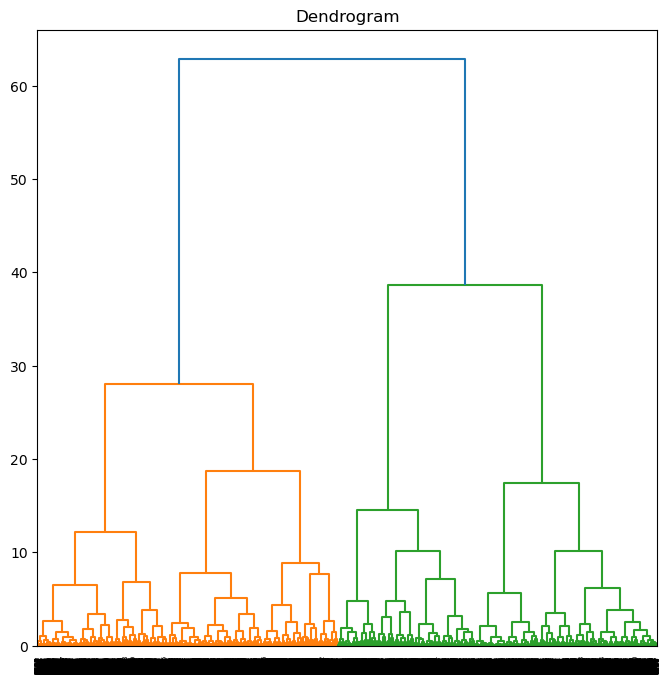

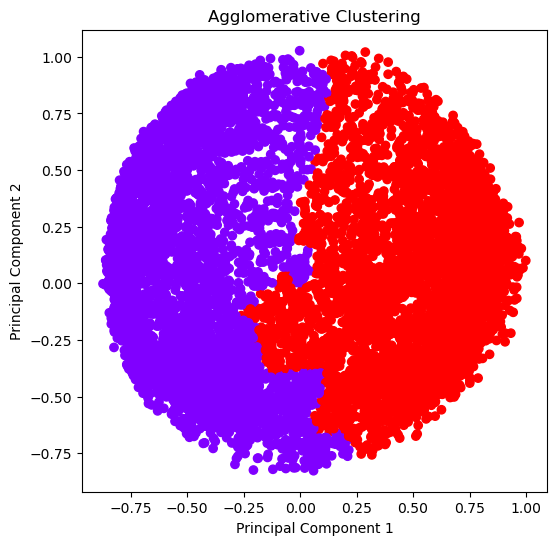

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/RAHULKASHYAP02/Credit-Card-Segmentation/master/CC%20GENERAL.csv'
X = pd.read_csv(url)

# Drop the 'CUST_ID' column from the data
X = X.drop('CUST_ID', axis=1)

# Handle missing values by forward filling
X.fillna(method='ffill', inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the data
X_normalized = normalize(X_scaled)

# Convert the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Visualize the data using a dendrogram
plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))

# Implement Agglomerative Clustering with 2 clusters
ac2 = AgglomerativeClustering(n_clusters=2)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

